In [1]:
import pandas as pd 
dataset = pd.read_csv("playtennis.csv")

In [2]:
dataset = dataset.iloc[:,1:]

In [3]:
dataset

,Outlook,Temp,Humidity,Wind,PlayTennis?
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [5]:
dataset['Outlook'] = Le.fit_transform(dataset['Outlook'])
dataset['Temp'] = Le.fit_transform(dataset['Temp'])
dataset['Humidity'] = Le.fit_transform(dataset['Humidity'])
dataset['Wind'] = Le.fit_transform(dataset['Wind'])
dataset['PlayTennis?'] = Le.fit_transform(dataset['PlayTennis?'])

In [6]:
dataset

,Outlook,Temp,Humidity,Wind,PlayTennis?
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [7]:
y = dataset["PlayTennis?"]
X = dataset.drop(["PlayTennis?"],axis=1)

In [8]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(X, y)

[Text(0.4444444444444444, 0.9, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.88888888

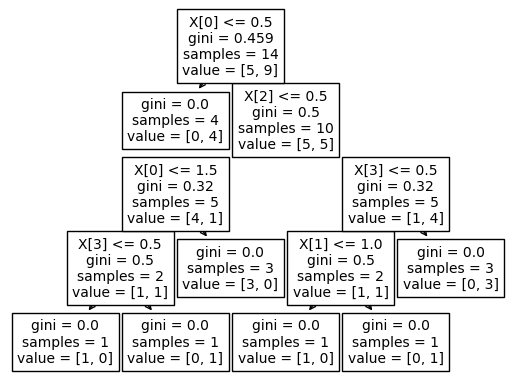

In [9]:
tree.plot_tree(clf)

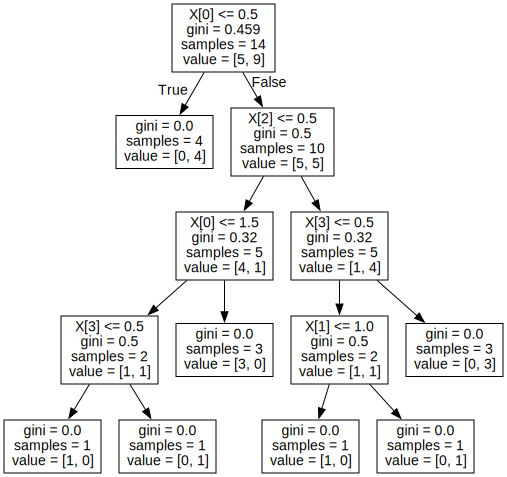

In [10]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph